In [84]:
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np
import time
from xgboost import XGBClassifier

In [85]:
dataset = pandas.read_csv("diabetes.csv")

X = dataset[dataset.columns.difference(["Outcome"])]
target = dataset["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.2, random_state=0)

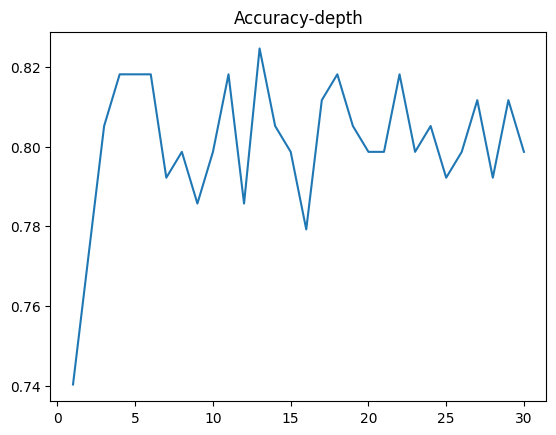

In [86]:
depths = range(1, 31)
scores = []

for depth in depths:
    classifier = RandomForestClassifier(max_depth=depth)
    classifier.fit(X_train, Y_train)
    Y_predicted = classifier.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_predicted))

pyplot.plot(depths, scores)
pyplot.title("Accuracy-depth")
pyplot.show()

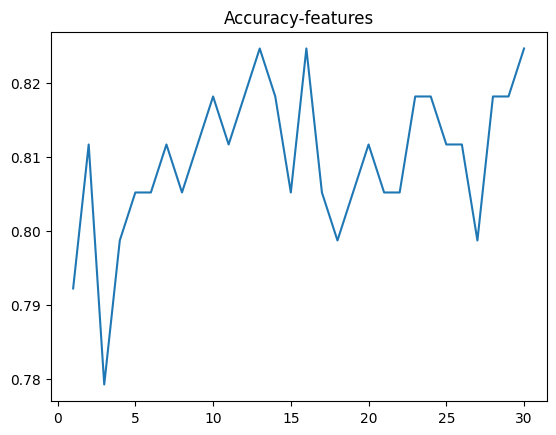

In [87]:
features_counts = range(1, 31, 1)
scores = []

for features_count in features_counts:
    classifier = RandomForestClassifier(max_features=features_count)
    classifier.fit(X_train, Y_train)
    Y_predicted = classifier.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_predicted))

pyplot.plot(features_counts, scores)
pyplot.title("Accuracy-features")
pyplot.show()

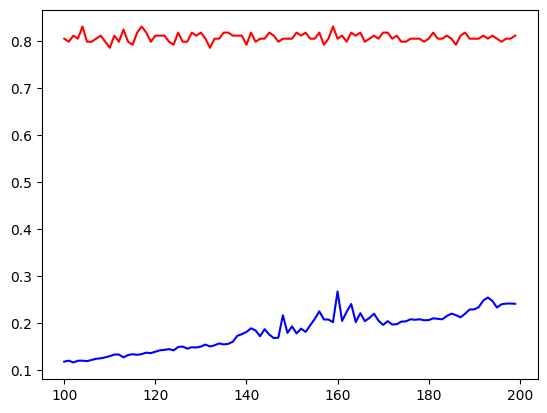

In [88]:
trees_counts = range(100, 200)
scores = []
learning_times = []

for trees_count in trees_counts:
    classifier = RandomForestClassifier(n_estimators=trees_count)

    startTime = time.time()
    classifier.fit(X_train, Y_train)
    learning_times.append(time.time() - startTime)
    Y_predicted = classifier.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_predicted))

bestScore = max(scores)
bestDepth = scores.index(bestScore) + 1
pyplot.plot(trees_counts, scores, color='r')
pyplot.plot(trees_counts, learning_times, color='b')
pyplot.show()

In [ ]:
depths = range(1, 10)
trees_counts = range(1, 10)

bestTime = float("Infinity")
bestScore = 0

bestTimeParams, bestScoreParams = None, None

for depth in depths:
    for trees in trees_counts:
        classifier = XGBClassifier(max_depth=depth, n_estimators=trees, objective='binary:logistic')

        startTime = time.time()
        classifier.fit(X_train, Y_train)
        learning_time = time.time() - startTime

        Y_predicted = classifier.predict(X_test)
        score = accuracy_score(Y_test, Y_predicted)

        if(learning_time < bestTime):
            bestTime = learning_time
            bestTimeParams = depth, trees
        
        if(score > bestScore):
            bestScore = score
            bestScoreParams = depth, trees
        

bestTimeParams, bestScoreParams

((6, 1), (3, 7))

In [ ]:
classifier = XGBClassifier(n_estimators=4, max_depth=4, objective='binary:logistic')

startTime = time.time()
classifier.fit(X_train, Y_train)
learning_time = time.time() - startTime

Y_predicted = classifier.predict(X_test)
score = accuracy_score(Y_test, Y_predicted)

print("Result for chosen parameters:")
print("Learning time:", learning_time, "seconds")
print("Score:", score)

Result for found parameters:
Learning time: 0.01004481315612793 seconds
Score: 0.7792207792207793
